In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Imputer

from sklearn.utils.estimator_checks import check_estimator

from sklearn.cross_validation import cross_val_score

In [2]:
trn_all = pd.read_csv('../data/train.csv')  # column #0 in our file is index

#selected features and Cut off outliers of Expected >= 69
#trn_new = trn_all[trn_all['Expected']<69]
trn_new = trn_all

#combine observations with same ID by using mean
#replace Nan by overall mean
trn_mean = trn_new.groupby(trn_new.Id).agg(['mean', 'median', 'std', 'count', 'min', 'max'])
trn_mean.columns = ['_'.join(col).strip() for col in trn_mean.columns.values]
trn_mean = trn_mean.drop(['Expected_count', 'Expected_median', 'Expected_std', 'Expected_min', 'Expected_max'], axis =1)

del trn_all
del trn_new

In [3]:
# ignore id's where all Ref vales are NaN
trn_mean = trn_mean[pd.notnull(trn_mean.Ref_mean)]

# Imputing
index2 = list(trn_mean)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

trn_mean= pd.DataFrame(imp.fit_transform(trn_mean),index = trn_mean.index, columns=index2)

In [4]:
# data preparation
X = trn_mean.loc[:,'minutes_past_mean':'Kdp_5x5_90th_max']
y = trn_mean.loc[:,'Expected_mean']

del trn_mean

In [5]:
#X.loc[:,['Ref_mean','Zdr_mean']

In [6]:
#X.loc[:,'Kdp_mean']

In [31]:
from REF_ZDR import REFZDRRegressor
import matplotlib.pyplot as plt
# plot plots inline
%matplotlib inline  

scale = np.arange(0.1,1.5,0.1)
indexes = range(0,len(scale))
#print indexes
#print scale

In [37]:
MAE = []
for idx in indexes: 
    estimator=REFZDRRegressor(refzdr_aa_scaling=0.0017,refzdr_bb_scaling=0.9,refzdr_cc_scaling=0.8) 
    estimator.fit(X = X, y =y)
    y_est = estimator.predict(X = X)
    MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

opt = MAE.index(min(MAE))
scale[opt] #best parameter: 0.003,1,1

0.10000000000000001

In [38]:
y_est

Id
2          0.000184
4          0.013038
7          0.000093
8          0.000100
10         0.006626
11         0.000264
12         0.001326
14         0.000278
15         0.000140
17         0.001060
18         0.000279
19         0.000245
24         0.003347
27         0.005027
28         0.000178
29         0.000069
32         0.000801
33         0.003692
34         0.002231
35         0.000422
36         0.003011
37         0.000010
38         0.002261
39         0.000019
40         0.000154
41         0.000804
42         0.001258
45         0.000329
51         0.001651
55         0.000260
             ...   
1180897    0.000875
1180898    0.001580
1180899    0.003169
1180901    0.000421
1180904    0.001731
1180909    0.007363
1180910    0.000730
1180911    0.004851
1180912    0.000580
1180913    0.002019
1180915    0.001156
1180918    0.000325
1180919    0.000025
1180920    0.000073
1180921    0.000045
1180922    0.000004
1180923    0.003559
1180924    0.000020
1180925    0.0012

In [39]:
print(scale[opt])
print(MAE)
print('\n')
print(min(MAE))

0.1
[23.992172881656899, 23.992326574970587, 23.992457938541914, 23.992567881111743, 23.992654054038525, 23.992715741939083, 23.992776764671898, 23.992918522503086, 23.993312646823924, 23.99422714465959, 23.996442301956364, 24.001793994237861, 24.014439687083819, 24.044254812494529]


23.9921728817


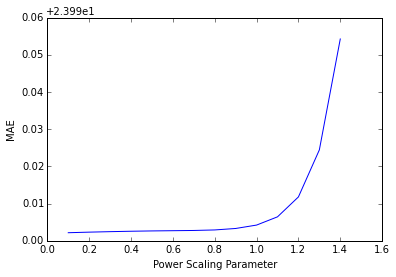

In [40]:
plt.plot(scale, MAE)
plt.xlabel("Power Scaling Parameter")
plt.ylabel("MAE")

In [42]:
MAE=[]
estimator=REFZDRRegressor(refzdr_aa_scaling=0.0017,refzdr_bb_scaling=0.9,refzdr_cc_scaling=0.8) 
estimator.fit(X = X, y =y)
y_est = estimator.predict(X = X)
MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

MAE

[23.992918522503086]

In [41]:
#trn_withRef_comb['KDP'] = pow(pow(10, trn_withRef_comb['Ref_mean']/10)/200, 0.625 * 0.82)

#KDP
#kdp_aa = 4.06
#kdp_bb = 0.0866
#kdp_aa_scaling=0.33
#kdp_bb_scaling=0.79
#trn_withRef_comb['KDP']=np.sign(trn_withRef_comb['Kdp_mean'])*(kdp_aa*kdp_aa_scaling)*pow(np.abs(trn_withRef_comb['Kdp_mean']),kdp_bb*kdp_bb_scaling)

#KDP_ZDR
#kdpzdr_aa = 13.6
#kdpzdr_bb = 0.0968
#kdpzdr_cc = -0.286
#kdpzdr_aa_scaling=0.003
#trn_withRef_comb['KDP_ZDR'] = np.sign(trn_withRef_comb['Kdp_mean'])*(kdpzdr_aa*kdpzdr_aa_scaling)*pow(np.abs(trn_withRef_comb['Kdp_mean']),kdpzdr_bb)*pow(pow(10,trn_withRef_comb['Zdr_mean']/10),kdpzdr_cc)